In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [18]:
(mnist_train_image, mnist_train_label),(mnist_test_image, mnist_test_label) = mnist.load_data()

we need to explicity convert the data into the format Keras/ Tensorflow expects. then we normalize the data into 0-1 range. after we convert it to float point values.

In [19]:
train_image = mnist_train_image.reshape(60000,784)
test_image = nist_test_image.reshape(10000, 784)

train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

train_image /= 255
test_image /= 255

now we convert the 0-9 labels into "one-hot" format.


In [20]:
train_label = keras.utils.to_categorical(mnist_train_label, 10)
test_label = keras.utils.to_categorical(mnist_test_label, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


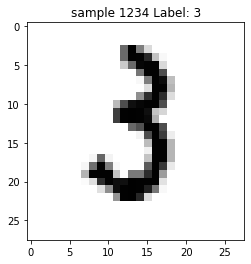

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


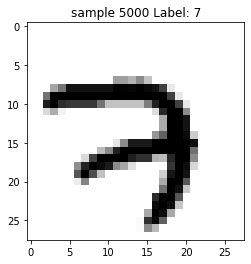

In [21]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_label[num])
    
    label = train_label[num].argmax(axis=0)
    
    image = train_image[num].reshape([28,28])
    plt.title('sample %d Label: %d'%(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)
display_sample(5000)

all the code in tensorflow need to creating lplaceholder, layers and linear lagebra but we dont nedd to do this keras.


in this session we implement NN which the input has 784(28*28) features and it feed to a hidden layer with 512 node and the out put of that feed to softmax with 10 nodes

In [22]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(10,activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = 'categorical_crossentropy',
             optimizer= RMSprop(),
             metrics =['accuracy'])

In [9]:
# model.compile(loss = 'categorical_crossentropy',
#              optimizer='adam' ,
#              metrics =['accuracy'])

train model with keras in line.here we'll do 10 epochs with a batch size of 100.keras is slower than tensorflow 

In [25]:
history = model.fit(train_image, 
                    train_label,
                    batch_size= 100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_image, test_label))

Epoch 1/10
600/600 - 4s - loss: 0.2382 - accuracy: 0.9305 - val_loss: 0.1136 - val_accuracy: 0.9664
Epoch 2/10
600/600 - 4s - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.0895 - val_accuracy: 0.9713
Epoch 3/10
600/600 - 4s - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0853 - val_accuracy: 0.9753
Epoch 4/10
600/600 - 4s - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.0640 - val_accuracy: 0.9811
Epoch 5/10
600/600 - 4s - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 6/10
600/600 - 4s - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0694 - val_accuracy: 0.9806
Epoch 7/10
600/600 - 4s - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0704 - val_accuracy: 0.9809
Epoch 8/10
600/600 - 4s - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 9/10
600/600 - 4s - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0750 - val_accuracy: 0.9799
Epoch 10/10
600/600 - 4s - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0840 - val_accuracy: 0.9801

In [26]:
score = model.evaluate(test_image, test_label, verbose= 0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.08399044722318649
test accuracy: 0.9800999760627747


In [28]:
for x in range(1000):
    test_image1 = test_image[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image1).argmax()
    label = test_label[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image1.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1